# Cleaning Sensor Data

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Set working directory
dir = "C:/Users/Alexander/Documents/GitHub/PassiveSensing-Symptoms-NetworkAnalysis"
os.chdir(dir)

# Load Data
# Self report: 2018 and 2019 baseline
selfreport_2018_2019 = pd.read_csv(os.path.join(dir, "data", "IHSdata_20182019_03062024.csv"))

# 2018: sensor (activity and sleep), self-report: baseline, Q1Q2, Q3, Q4
c2018_step_sleep_mood_daily_BL = pd.read_csv(os.path.join(dir, "data/2018", "US_step_sleep_mood_daily_2018cohort_BL.csv"))
c2018_step_sleep_mood_daily_Q1Q2 = pd.read_csv(os.path.join(dir, "data/2018", "US_step_sleep_mood_daily_2018cohort_Q1Q2.csv"))
c2018_step_sleep_mood_daily_Q3 = pd.read_csv(os.path.join(dir, "data/2018", "US_step_sleep_mood_daily_2018cohort_Q3.csv"))
c2018_step_sleep_mood_daily_Q4 = pd.read_csv(os.path.join(dir, "data/2018", "US_step_sleep_mood_daily_2018cohort_Q4.csv"))

# 2019: sensor (activity and sleep), self-report: baseline, Q1Q2, Q3, Q4
c2019_step_sleep_mood_daily_BLQ1 = pd.read_csv(os.path.join(dir, "data/2019", "Step_sleep_mood_daily_2019_BLQ1.csv"))
c2019_step_sleep_mood_daily_Q2 = pd.read_csv(os.path.join(dir, "data/2019", "Step_sleep_mood_daily_2019_Q2.csv"))
c2019_step_sleep_mood_daily_Q3 = pd.read_csv(os.path.join(dir, "data/2019", "Step_sleep_mood_daily_2019_Q3.csv"))
c2019_step_sleep_mood_daily_Q4 = pd.read_csv(os.path.join(dir, "data/2019", "Step_sleep_mood_daily_2019_Q4.csv"))

# Data Cleaning & Preprocessing
# Check UserIDs who answered "Yes" (1) to Q1 of C-SSRS questionnaire
ssrs_wish = selfreport_2018_2019[
    selfreport_2018_2019[['ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4']].eq(1).any(axis=1)
][['UserID', 'Year', 'ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4']]

# Summary of ssrs_wish
ssrs_wish_summ = pd.melt(ssrs_wish, id_vars=['UserID', 'Year'], 
                        value_vars=['ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4'])
ssrs_wish_summ['wish_dead'] = ssrs_wish_summ['value'].map({1: 'Yes', 2: 'No'})
ssrs_wish_summ = ssrs_wish_summ.groupby(['Year', 'variable', 'wish_dead']).size().reset_index(name='n')
ssrs_wish_summ = ssrs_wish_summ.sort_values('wish_dead')

# Check UserIDs who answered "Yes" (1) to Q2 of C-SSRS questionnaire
ssrs_kill = selfreport_2018_2019[
    (selfreport_2018_2019['Year'] == 2018) &
    selfreport_2018_2019[['ssrs_kill1', 'ssrs_kill2', 'ssrs_kill3', 'ssrs_kill4']].eq(1).any(axis=1)
][['UserID', 'Year', 'ssrs_kill1', 'ssrs_kill2', 'ssrs_kill3', 'ssrs_kill4']]

# Summary of ssrs_kill
ssrs_kill_summ = pd.melt(ssrs_kill, id_vars=['UserID', 'Year'],
                        value_vars=['ssrs_kill1', 'ssrs_kill2', 'ssrs_kill3', 'ssrs_kill4'])
ssrs_kill_summ['thought_killing'] = ssrs_kill_summ['value'].map({1: 'Yes', 2: 'No'})
ssrs_kill_summ = ssrs_kill_summ.groupby(['Year', 'variable', 'thought_killing']).size().reset_index(name='n')
ssrs_kill_summ = ssrs_kill_summ.sort_values('thought_killing')

# Daily sensor data processing
# Baseline
c2018_step_sleep_mood_daily_BL['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_BL['METRIC_START_DATE'])
c2018_daily_BL = (c2018_step_sleep_mood_daily_BL
    .rename(columns={
        'STUDY_PRTCPT_ID': 'UserID',
        'STEP_COUNT': 'step',
        'SLEEP_COUNT': 'sleep',
        'MOOD': 'mood',
        'METRIC_START_DATE': 'date'
    })
    .assign(quarter='BL')
    .drop(columns=['METRIC_END_DATE', 'STUDY_ID'])
)

# Q1 and Q2
c2018_step_sleep_mood_daily_Q1Q2['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_Q1Q2['METRIC_START_DATE'])
c2018_daily_Q1Q2 = (c2018_step_sleep_mood_daily_Q1Q2
    .rename(columns={
        'STUDY_PRTCPT_ID': 'UserID',
        'STEP_COUNT': 'step',
        'SLEEP_COUNT': 'sleep',
        'MOOD': 'mood',
        'METRIC_START_DATE': 'date'
    })
    .assign(
        month_start=lambda x: x['date'].dt.strftime('%b'),
        quarter=lambda x: np.where(x['month_start'].isin(['Jul', 'Aug', 'Sep']), 'Q1', 'Q2')
    )
    .drop(columns=['METRIC_END_DATE', 'STUDY_ID', 'month_start'])
)

# Q3
c2018_step_sleep_mood_daily_Q3['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_Q3['METRIC_START_DATE'])
c2018_daily_Q3 = (c2018_step_sleep_mood_daily_Q3
    .rename(columns={
        'STUDY_PRTCPT_ID': 'UserID',
        'STEP_COUNT': 'step',
        'SLEEP_COUNT': 'sleep',
        'MOOD': 'mood',
        'METRIC_START_DATE': 'date'
    })
    .assign(quarter='Q3')
    .drop(columns=['METRIC_END_DATE', 'STUDY_ID'])
)

# Q4
c2018_step_sleep_mood_daily_Q4['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_Q4['METRIC_START_DATE'])
c2018_daily_Q4 = (c2018_step_sleep_mood_daily_Q4
    .rename(columns={
        'STUDY_PRTCPT_ID': 'UserID',
        'STEP_COUNT': 'step',
        'SLEEP_COUNT': 'sleep',
        'MOOD': 'mood',
        'METRIC_START_DATE': 'date'
    })
    .assign(quarter='Q4')
    .drop(columns=['METRIC_END_DATE', 'STUDY_ID'])
)

# 2018 - Combine all quarterly data
c2018_BL_Q1_Q2_Q3_Q4 = pd.concat([
    c2018_daily_BL, 
    c2018_daily_Q1Q2, 
    c2018_daily_Q3, 
    c2018_daily_Q4
]).sort_values(['UserID', 'quarter']).reset_index(drop=True)

# 2019 - Combine all quarterly data
c2019_BL_Q1_Q2_Q3_Q4 = pd.concat([
    c2019_step_sleep_mood_daily_BLQ1,
    c2019_step_sleep_mood_daily_Q2,
    c2019_step_sleep_mood_daily_Q3,
    c2019_step_sleep_mood_daily_Q4
]).sort_values(['UserID', 'quarter']).reset_index(drop=True)

# The final datasets are now available in:
# c2018_BL_Q1_Q2_Q3_Q4
# c2019_BL_Q1_Q2_Q3_Q4

In [3]:
c2018_BL_Q1_Q2_Q3_Q4

,UserID,step,sleep,mood,date,quarter
0,400070,0,0,10,2018-05-02,BL
1,400070,0,0,7,2018-05-08,BL
2,400070,0,0,7,2018-05-03,BL
3,400070,0,0,8,2018-05-05,BL
4,400070,0,0,8,2018-05-07,BL
...,...,...,...,...,...,...
432248,499998,3672,442,10,2019-06-25,Q4
432249,499998,34533,365,0,2019-06-26,Q4
432250,499998,0,0,10,2019-06-28,Q4
432251,499998,3106,0,0,2019-06-27,Q4


In [4]:
c2018_BL_Q1_Q2_Q3_Q4.UserID.nunique()
c2019_BL_Q1_Q2_Q3_Q4.UserID.nunique()

1712

In [5]:
# First identify UserIDs that have all zeros in any quarter
zero_records = (c2018_BL_Q1_Q2_Q3_Q4[
    (c2018_BL_Q1_Q2_Q3_Q4['step'] == 0) &
    (c2018_BL_Q1_Q2_Q3_Q4['sleep'] == 0) 
].groupby(['UserID', 'quarter']).size().reset_index(name='zero_count'))

total_records = c2018_BL_Q1_Q2_Q3_Q4.groupby(['UserID', 'quarter']).size().reset_index(name='total_count')

# Merge and find problematic UserIDs
comparison = zero_records.merge(total_records, on=['UserID', 'quarter'])
problematic_users = comparison[comparison['zero_count'] == comparison['total_count']]['UserID'].unique()

# Drop these users from the dataset
c2018_BL_Q1_Q2_Q3_Q4_cl = c2018_BL_Q1_Q2_Q3_Q4[~c2018_BL_Q1_Q2_Q3_Q4['UserID'].isin(problematic_users)]

# Print summary
print(f"Number of users with all-zero quarters: {len(problematic_users)}")
print(f"Original dataset shape: {c2018_BL_Q1_Q2_Q3_Q4.shape}")
print(f"Clean dataset shape: {c2018_BL_Q1_Q2_Q3_Q4_cl.shape}")
print("\nUserIDs dropped:")
print(problematic_users)

quarterly_averages_2018 = c2018_BL_Q1_Q2_Q3_Q4.groupby(['quarter', 'UserID'])[['step', 'sleep', 'mood']].mean().round(2)
quarterly_averages_2018

Number of users with all-zero quarters: 1192
Original dataset shape: (432253, 6)
Clean dataset shape: (278397, 6)

UserIDs dropped:
[400070 400082 400083 ... 499641 499643 499859]


step   sleep  mood
quarter UserID                       
BL      400070  7243.54  288.20  5.73
        400082  8167.27  272.05  5.35
        400083     0.00    0.00  6.64
        400199  8937.20   22.59  4.92
        400226  5764.54  326.92  7.73
...                 ...     ...   ...
Q4      499643     0.00    0.00  6.29
        499703  9835.73  362.15  4.87
        499944  9825.20  344.90  4.48
        499982     0.00  323.47  0.00
        499998  9807.99  219.09  4.51

[8608 rows x 3 columns]

In [6]:
# First identify UserIDs that have all zeros in any quarter
zero_records = (c2019_BL_Q1_Q2_Q3_Q4[
    (c2019_BL_Q1_Q2_Q3_Q4['step'] == 0) &
    (c2019_BL_Q1_Q2_Q3_Q4['sleep'] == 0) 
].groupby(['UserID', 'quarter']).size().reset_index(name='zero_count'))

total_records = c2019_BL_Q1_Q2_Q3_Q4.groupby(['UserID', 'quarter']).size().reset_index(name='total_count')

# Merge and find problematic UserIDs
comparison = zero_records.merge(total_records, on=['UserID', 'quarter'])
problematic_users = comparison[comparison['zero_count'] == comparison['total_count']]['UserID'].unique()

# Drop these users from the dataset
c2019_BL_Q1_Q2_Q3_Q4_cl = c2019_BL_Q1_Q2_Q3_Q4[~c2019_BL_Q1_Q2_Q3_Q4['UserID'].isin(problematic_users)]

# Print summary
print(f"Number of users with all-zero quarters: {len(problematic_users)}")
print(f"Original dataset shape: {c2019_BL_Q1_Q2_Q3_Q4.shape}")
print(f"Clean dataset shape: {c2019_BL_Q1_Q2_Q3_Q4_cl.shape}")
print("\nUserIDs dropped:")
print(problematic_users)

quarterly_averages_2019 = c2019_BL_Q1_Q2_Q3_Q4.groupby(['quarter', 'UserID'])[['step', 'sleep', 'mood']].mean().round(2)
quarterly_averages_2019

Number of users with all-zero quarters: 699
Original dataset shape: (377820, 6)
Clean dataset shape: (289956, 6)

UserIDs dropped:
[500200 500254 500394 500413 500444 500502 500711 501218 501238 501421
 501700 501911 502520 502537 502547 502713 502861 502869 503025 503039
 503095 503316 503370 503424 503441 504152 504517 504938 505038 505076
 505226 505289 505495 505571 505586 505697 505715 506017 506197 506210
 506463 506488 506492 506643 506644 506700 506765 506894 507044 507195
 507400 507456 507622 507850 507958 508048 508145 508204 508307 508620
 508628 508684 508800 508825 508960 509150 509159 509257 509287 509413
 509570 509817 509870 510122 510146 510293 510310 510978 511260 511425
 511512 511806 512088 512090 512129 512176 512241 512265 512334 512396
 512504 512658 512848 512917 513760 513853 513908 513924 513942 514339
 514362 514472 514567 514600 514840 514944 515422 515622 516180 516188
 516362 516445 516575 516832 517096 517188 517336 517381 517506 517983
 518170 518177 51

step   sleep  mood
quarter UserID                       
BL      500200  2661.02  136.13  9.18
        500215  5802.25  166.88  4.88
        500254  2142.94   60.78  7.06
        500345  8433.97  320.86  2.97
        500347   253.73    0.00  5.03
...                 ...     ...   ...
Q4      599680  8031.52  380.16  2.18
        599700  7687.56  409.45  2.80
        599710  7910.01  407.53  8.51
        599957     0.00    0.00  2.45
        599972  8551.73  377.88  4.44

[6615 rows x 3 columns]

In [7]:
# First, reset index to get quarter as a column
quarterly_averages_2018 = quarterly_averages_2018.reset_index()
quarterly_averages_2019 = quarterly_averages_2019.reset_index()

# Create period variable based on quarter
def quarter_to_period(quarter):
    quarter_dict = {
        'BL': 0,
        'Q1': 1,
        'Q2': 2,
        'Q3': 3,
        'Q4': 4
    }
    return quarter_dict[quarter]

# Add period column to both datasets
quarterly_averages_2018['period'] = quarterly_averages_2018['quarter'].map(quarter_to_period)
quarterly_averages_2019['period'] = quarterly_averages_2019['quarter'].map(quarter_to_period)

# Combine datasets
combined_data = pd.concat([quarterly_averages_2018, quarterly_averages_2019])

# Reorganize columns
data_sensor_final = combined_data[['UserID', 'period', 'step', 'sleep', 'mood']]

# Sort by UserID and period
data_sensor_final = data_sensor_final.sort_values(['UserID', 'period']).reset_index(drop=True)

# Display results
print("Combined data shape:", data_sensor_final.shape)
print("\nSample of combined data:")
print(data_sensor_final.head(10))
print("\nUnique periods:", sorted(data_sensor_final['period'].unique()))
print("Number of unique users:", data_sensor_final['UserID'].nunique())

Combined data shape: (15223, 5)

Sample of combined data:
   UserID  period     step   sleep  mood
0  400070       0  7243.54  288.20  5.73
1  400070       1  8606.01  314.84  2.44
2  400070       2  8189.31  329.97  1.53
3  400070       4     0.00    0.00  9.00
4  400082       0  8167.27  272.05  5.35
5  400082       1  6093.06  207.71  4.20
6  400082       2     0.00  119.21  4.27
7  400082       3     0.00    0.00  6.36
8  400082       4     0.00    0.00  5.00
9  400083       0     0.00    0.00  6.64

Unique periods: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Number of unique users: 3885


In [8]:
data_sensor_final

,UserID,period,step,sleep,mood
0,400070,0,7243.54,288.20,5.73
1,400070,1,8606.01,314.84,2.44
2,400070,2,8189.31,329.97,1.53
3,400070,4,0.00,0.00,9.00
4,400082,0,8167.27,272.05,5.35
...,...,...,...,...,...
15218,599972,0,8359.17,279.66,6.95
15219,599972,1,8936.45,396.97,6.83
15220,599972,2,9000.20,376.50,6.20
15221,599972,3,7667.37,411.48,5.56


In [9]:
# Filter data for UserID 400070
data_sensor_final[data_sensor_final['UserID'] == 400070]

# Additional checks
print("\nNumber of records for UserID 400070:")
print(len(data_sensor_final[data_sensor_final['UserID'] == 400070]))

# Show all periods for this user
print("\nPeriods available for UserID 400070:")
print(data_sensor_final[data_sensor_final['UserID'] == 400070]['period'].value_counts().sort_index())


Number of records for UserID 400070:
4

Periods available for UserID 400070:
period
0    1
1    1
2    1
4    1
Name: count, dtype: int64


In [10]:
data_sensor_final[data_sensor_final['UserID'] == 400070]

,UserID,period,step,sleep,mood
0,400070,0,7243.54,288.20,5.73
1,400070,1,8606.01,314.84,2.44
2,400070,2,8189.31,329.97,1.53
3,400070,4,0.00,0.00,9.00


In [11]:
# 'UserID',
# 'Year',
# 'Age',
# 'Sex',
# 'Marital',
# 'SigOther0',
# 'Child',
# 'Ethnicity',
# 'religious',
# 'EFE0',|
# 'Neu0',
# 'depr0',
# 'deprTreat0',
# 'specTreat0_Medication',
# 'specTreat0_Psychotherapy',
# hours
# daysoff
# sleep24h
# sleepAve
# ssrs_wish



# Self Report

In [12]:
# Function to process each time-varying variable
def create_period_data(df, var_name, start_period=0, end_period=4):
    period_data = []
    for period in range(start_period, end_period + 1):
        # Handle different naming conventions
        if var_name == 'error1':
            col_name = f'{var_name}_{period}'
        else:
            col_name = f'{var_name}{period}'
        
        # Get data for this period
        period_df = df[['UserID', col_name]].copy()
        period_df['period'] = period
        period_df = period_df.rename(columns={col_name: var_name})
        period_data.append(period_df)
    
    # Combine all periods
    var_panel = pd.concat(period_data)
    return var_panel.sort_values(['UserID', 'period']).reset_index(drop=True)

# Process variables with periods 0-4
vars_0_4 = ['sleep24h', 'PHQtot', 'PHQ10above', 'sleepAve', 'SLE', 'ssrs_wish', 'hours']
panel_data_list = []

for var in vars_0_4:
    print(f"Processing {var}")
    var_panel = create_period_data(selfreport_2018_2019, var, 0, 4)
    panel_data_list.append(var_panel)

# Process variables with periods 1-4
vars_1_4 = ['rotation', 'daysoff']
for var in vars_1_4:
    print(f"Processing {var}")
    var_panel = create_period_data(selfreport_2018_2019, var, 1, 4)
    panel_data_list.append(var_panel)

# Process error1 separately (different naming convention)
print("Processing error1")
error_panel = create_period_data(selfreport_2018_2019, 'error1', 1, 4)
panel_data_list.append(error_panel)

# Create base panel structure
users = selfreport_2018_2019['UserID'].unique()
base_panel = pd.DataFrame([(user, period) for user in users for period in range(5)],
                         columns=['UserID', 'period'])

# Merge all variables into the base panel
panel_data = base_panel.copy()
for var_panel in panel_data_list:
    var_name = var_panel.columns[1]  # Get variable name (excluding UserID and period)
    panel_data = panel_data.merge(
        var_panel[['UserID', 'period', var_name]], 
        on=['UserID', 'period'], 
        how='left'
    )

# Add fixed variables
fixed_vars = [
    'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT'
]
panel_data = panel_data.merge(selfreport_2018_2019[['UserID'] + fixed_vars], on='UserID', how='left')

# Sort final dataset
panel_data = panel_data.sort_values(['UserID', 'period']).reset_index(drop=True)

# Verify results
print("\nFinal panel shape:", panel_data.shape)
print("\nSample of final panel data:")
print(panel_data.head(10))

# Verify data for each variable
for var in vars_0_4:
    print(f"\n{var} data by period:")
    for period in range(5):
        count = panel_data[panel_data['period'] == period][var].notna().sum()
        print(f"Period {period}: {count} non-null values")

Processing sleep24h
Processing PHQtot
Processing PHQ10above
Processing sleepAve
Processing SLE
Processing ssrs_wish
Processing hours
Processing rotation
Processing daysoff
Processing error1

Final panel shape: (19060, 27)

Sample of final panel data:
   UserID  period  sleep24h  PHQtot  PHQ10above  sleepAve  SLE  ssrs_wish  \
0  400070       0       7.0     0.0         0.0       7.0  0.0        2.0   
1  400070       1       6.0     7.0         0.0       6.0  0.0        2.0   
2  400070       2       5.0    10.0         1.0       6.0  0.0        2.0   
3  400070       3       NaN     NaN         NaN       NaN  NaN        NaN   
4  400070       4       NaN     NaN         NaN       NaN  NaN        NaN   
5  400082       0       6.0     3.0         0.0       6.0  1.0        1.0   
6  400082       1       6.0    15.0         1.0       6.0  0.0        2.0   
7  400082       2       8.0     7.0         0.0       7.0  0.0        2.0   
8  400082       3       5.0    12.0         1.0       6.

In [13]:
panel_data

,UserID,period,sleep24h,PHQtot,PHQ10above,sleepAve,SLE,ssrs_wish,hours,rotation,...,SigOther0,Ethnicity,Neu0,EFE0,depr0,deprTreat0,specTreat0_Medication,specTreat0_Psychotherapy,specTreat0_Other,specTreat0_Other_TEXT
0,400070,0,7.0,0.0,0.0,7.0,0.0,2.0,0.0,NaN,...,1,1.0,35.0,9.0,1,1.0,1.0,1.0,NaN,NaN
1,400070,1,6.0,7.0,0.0,6.0,0.0,2.0,60.0,2.0,...,1,1.0,35.0,9.0,1,1.0,1.0,1.0,NaN,NaN
2,400070,2,5.0,10.0,1.0,6.0,0.0,2.0,6.0,1.0,...,1,1.0,35.0,9.0,1,1.0,1.0,1.0,NaN,NaN
3,400070,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1.0,35.0,9.0,1,1.0,1.0,1.0,NaN,NaN
4,400070,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1.0,35.0,9.0,1,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19055,599972,0,9.5,0.0,0.0,8.5,1.0,2.0,3.0,NaN,...,2,4.0,35.0,21.0,1,2.0,NaN,NaN,NaN,NaN
19056,599972,1,7.0,11.0,1.0,6.0,0.0,2.0,85.0,1.0,...,2,4.0,35.0,21.0,1,2.0,NaN,NaN,NaN,NaN
19057,599972,2,6.5,11.0,1.0,6.0,0.0,2.0,78.5,1.0,...,2,4.0,35.0,21.0,1,2.0,NaN,NaN,NaN,NaN
19058,599972,3,7.0,7.0,0.0,6.8,0.0,2.0,72.0,1.0,...,2,4.0,35.0,21.0,1,2.0,NaN,NaN,NaN,NaN


In [81]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # 1. First, let's look at continuous variables
# continuous_vars = ['sleep24h', 'PHQtot', 'sleepAve', 'hours']

# # Distribution plots for each continuous variable by period
# for var in continuous_vars:
#     plt.figure(figsize=(15, 5))
#     for period in range(5):
#         plt.subplot(1, 5, period+1)
#         sns.histplot(data=panel_data[panel_data['period'] == period][var].dropna(), kde=True)
#         plt.title(f'Period {period}')
#     plt.suptitle(f'Distribution of {var} across periods', y=1.05)
#     plt.tight_layout()
#     plt.show()

# # Box plots
# plt.figure(figsize=(12, 6))
# for i, var in enumerate(continuous_vars):
#     plt.subplot(2, 2, i+1)
#     sns.boxplot(data=panel_data, x='period', y=var)
#     plt.title(f'{var} by Period')
# plt.tight_layout()
# plt.show()

# # 2. Correlation heatmap
# plt.figure(figsize=(10, 8))
# correlation_matrix = panel_data[continuous_vars].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix')
# plt.show()

# # 3. Time trends
# plt.figure(figsize=(10, 6))
# for var in continuous_vars:
#     means = panel_data.groupby('period')[var].mean()
#     plt.plot(means.index, means.values, marker='o', label=var)
# plt.title('Mean Values Over Time')
# plt.xlabel('Period')
# plt.ylabel('Mean Value')
# plt.legend()
# plt.grid(True)
# plt.show()

# # 4. Categorical variables
# categorical_vars = ['rotation', 'PHQ10above', 'ssrs_wish']

# for var in categorical_vars:
#     plt.figure(figsize=(15, 5))
#     for period in range(5):
#         plt.subplot(1, 5, period+1)
#         data = panel_data[panel_data['period'] == period][var].value_counts().sort_index()
#         sns.barplot(x=data.index, y=data.values)
#         plt.title(f'Period {period}')
#     plt.suptitle(f'Distribution of {var} across periods', y=1.05)
#     plt.tight_layout()
#     plt.show()

# # 5. Pair plot for continuous variables
# sns.pairplot(panel_data[continuous_vars])
# plt.show()

# # Print basic statistics
# for var in continuous_vars + categorical_vars:
#     print(f"\nSummary statistics for {var}:")
#     print(panel_data.groupby('period')[var].describe())

In [14]:
# Rename period to quarter
panel_data = panel_data.rename(columns={'period': 'quarter'})


# merge datasets


In [15]:
data_sensor_final = pd.read_csv("./data/clean_data/sensor_all_wide.csv")
data_sensor_final

,Unnamed: 0,UserID,Year,quarter,n_sensordays_actmin,n_sensordays_mood,n_sensordays_sleep,n_sensordays_step,mean_actmin,mean_mood,...,se_sleep,se_step,median_actmin,median_mood,median_sleep,median_step,IQR_actmin,IQR_mood,IQR_sleep,IQR_step
0,1,400070,2018,1,81,81,81,81,15.9,2.2,...,20.6,395.6,9.0,0.0,380.0,9076.0,20.0,6.0,206.0,3464.0
1,2,400070,2018,2,32,32,32,32,16.5,0.8,...,35.9,884.2,3.5,0.0,381.5,9010.0,15.2,0.0,217.2,3221.5
2,3,400082,2018,1,50,50,50,50,29.3,3.7,...,24.9,704.4,19.0,5.0,312.0,7803.0,30.5,7.0,205.0,4781.5
3,4,400082,2018,2,19,19,19,19,23.7,1.9,...,32.0,0.0,18.0,0.0,346.0,0.0,15.0,5.5,192.5,0.0
4,5,400199,2018,1,77,77,77,77,43.8,2.2,...,15.5,468.4,30.0,0.0,0.0,8741.0,62.5,6.0,0.0,4908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,8805,599957,2019,2,29,29,29,29,13.8,2.4,...,18.4,497.3,0.0,0.0,0.0,199.0,0.0,6.0,0.0,4675.0
8805,8806,599972,2019,1,92,92,92,92,24.2,6.8,...,10.3,321.1,12.0,7.0,394.0,8645.0,35.5,0.0,76.0,3425.5
8806,8807,599972,2019,2,92,92,92,92,32.9,6.2,...,14.2,360.9,18.0,7.0,404.0,8112.0,54.0,1.0,75.2,3366.8
8807,8808,599972,2019,3,91,91,91,91,198.9,5.6,...,13.8,336.4,231.0,6.0,426.0,7542.0,106.0,2.0,108.0,3938.5


In [16]:
# Merge datasets
merged_data = panel_data.merge(
    data_sensor_final,
    on=['UserID', 'quarter'],
    how='inner',
    suffixes=('', '_sensor')  # This avoids duplicate column names
)

# Print verification info
print("Original panel_data shape:", panel_data.shape)
print("data_sensor_final shape:", data_sensor_final.shape)
print("Merged data shape:", merged_data.shape)

# Check sample of merged data
print("\nSample of merged data:")
print(merged_data.head())

# Verify merge success
print("\nNumber of unique users in:")
print(f"panel_data: {panel_data['UserID'].nunique()}")
print(f"data_sensor_final: {data_sensor_final['UserID'].nunique()}")
print(f"merged_data: {merged_data['UserID'].nunique()}")

# Check for any duplicate columns and missing values
print("\nColumns in merged dataset:")
print(merged_data.columns.tolist())

Original panel_data shape: (19060, 27)
data_sensor_final shape: (8809, 28)
Merged data shape: (8796, 53)

Sample of merged data:
   UserID  quarter  sleep24h  PHQtot  PHQ10above  sleepAve  SLE  ssrs_wish  \
0  400070        1       6.0     7.0         0.0       6.0  0.0        2.0   
1  400070        2       5.0    10.0         1.0       6.0  0.0        2.0   
2  400082        1       6.0    15.0         1.0       6.0  0.0        2.0   
3  400082        2       8.0     7.0         0.0       7.0  0.0        2.0   
4  400199        1       3.0     5.0         0.0       7.0  1.0        2.0   

   hours  rotation  ...  se_sleep  se_step  median_actmin  median_mood  \
0   60.0       2.0  ...      20.6    395.6            9.0          0.0   
1    6.0       1.0  ...      35.9    884.2            3.5          0.0   
2   80.0       3.0  ...      24.9    704.4           19.0          5.0   
3   40.0       2.0  ...      32.0      0.0           18.0          0.0   
4   84.0       1.0  ...      15.

In [228]:
merged_data.Year

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
8791    2019
8792    2019
8793    2019
8794    2019
8795    2019
Name: Year, Length: 8796, dtype: int64

<Axes: >

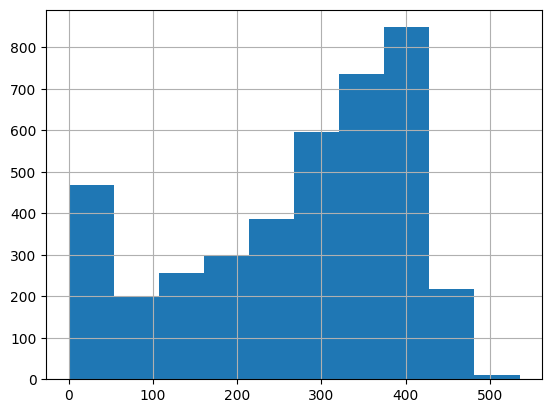

In [231]:
merged_data_2019 = merged_data[merged_data['Year'] == 2019]
merged_data_2019.mean_sleep.hist()


In [206]:
# Print original shape
print("Original shape:", merged_data.shape)

# Drop observations where n_sensordays_actmin < 15
merged_data_clean_15 = merged_data[merged_data['n_sensordays_actmin'] >= 15].copy()

# Reset index after dropping rows
merged_data_clean_15 = merged_data_clean_15.reset_index(drop=True)
merged_data_clean_15

Original shape: (19060, 53)


,UserID,quarter,sleep24h,PHQtot,PHQ10above,sleepAve,SLE,ssrs_wish,hours,rotation,...,se_sleep,se_step,median_actmin,median_mood,median_sleep,median_step,IQR_actmin,IQR_mood,IQR_sleep,IQR_step
0,400070,1,6.0,7.0,0.0,6.0,0.0,2.0,60.0,2.0,...,20.6,395.6,9.0,0.0,380.0,9076.0,20.0,6.0,206.0,3464.0
1,400070,2,5.0,10.0,1.0,6.0,0.0,2.0,6.0,1.0,...,35.9,884.2,3.5,0.0,381.5,9010.0,15.2,0.0,217.2,3221.5
2,400082,1,6.0,15.0,1.0,6.0,0.0,2.0,80.0,3.0,...,24.9,704.4,19.0,5.0,312.0,7803.0,30.5,7.0,205.0,4781.5
3,400082,2,8.0,7.0,0.0,7.0,0.0,2.0,40.0,2.0,...,32.0,0.0,18.0,0.0,346.0,0.0,15.0,5.5,192.5,0.0
4,400199,1,3.0,5.0,0.0,7.0,1.0,2.0,84.0,1.0,...,15.5,468.4,30.0,0.0,0.0,8741.0,62.5,6.0,0.0,4908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,599957,2,6.0,9.0,0.0,6.0,1.0,2.0,72.0,1.0,...,18.4,497.3,0.0,0.0,0.0,199.0,0.0,6.0,0.0,4675.0
7960,599972,1,7.0,11.0,1.0,6.0,0.0,2.0,85.0,1.0,...,10.3,321.1,12.0,7.0,394.0,8645.0,35.5,0.0,76.0,3425.5
7961,599972,2,6.5,11.0,1.0,6.0,0.0,2.0,78.5,1.0,...,14.2,360.9,18.0,7.0,404.0,8112.0,54.0,1.0,75.2,3366.8
7962,599972,3,7.0,7.0,0.0,6.8,0.0,2.0,72.0,1.0,...,13.8,336.4,231.0,6.0,426.0,7542.0,106.0,2.0,108.0,3938.5


<Axes: >

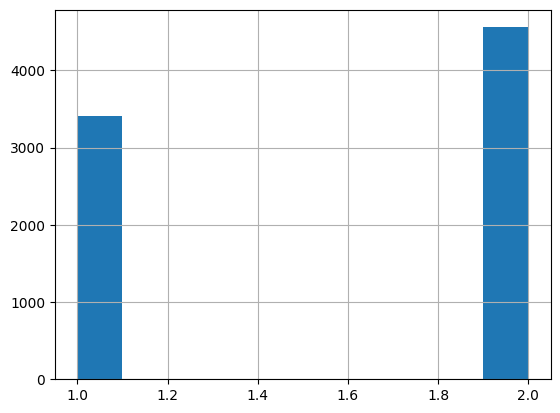

In [207]:
merged_data_clean_15.Sex.hist()

In [208]:
data_clean_15_pos_sleep = merged_data_clean_15[merged_data_clean_15['mean_sleep'] != 0]
data_clean_15_pos_sleep

,UserID,quarter,sleep24h,PHQtot,PHQ10above,sleepAve,SLE,ssrs_wish,hours,rotation,...,se_sleep,se_step,median_actmin,median_mood,median_sleep,median_step,IQR_actmin,IQR_mood,IQR_sleep,IQR_step
0,400070,1,6.0,7.0,0.0,6.0,0.0,2.0,60.0,2.0,...,20.6,395.6,9.0,0.0,380.0,9076.0,20.0,6.0,206.0,3464.0
1,400070,2,5.0,10.0,1.0,6.0,0.0,2.0,6.0,1.0,...,35.9,884.2,3.5,0.0,381.5,9010.0,15.2,0.0,217.2,3221.5
2,400082,1,6.0,15.0,1.0,6.0,0.0,2.0,80.0,3.0,...,24.9,704.4,19.0,5.0,312.0,7803.0,30.5,7.0,205.0,4781.5
3,400082,2,8.0,7.0,0.0,7.0,0.0,2.0,40.0,2.0,...,32.0,0.0,18.0,0.0,346.0,0.0,15.0,5.5,192.5,0.0
4,400199,1,3.0,5.0,0.0,7.0,1.0,2.0,84.0,1.0,...,15.5,468.4,30.0,0.0,0.0,8741.0,62.5,6.0,0.0,4908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,599957,2,6.0,9.0,0.0,6.0,1.0,2.0,72.0,1.0,...,18.4,497.3,0.0,0.0,0.0,199.0,0.0,6.0,0.0,4675.0
7960,599972,1,7.0,11.0,1.0,6.0,0.0,2.0,85.0,1.0,...,10.3,321.1,12.0,7.0,394.0,8645.0,35.5,0.0,76.0,3425.5
7961,599972,2,6.5,11.0,1.0,6.0,0.0,2.0,78.5,1.0,...,14.2,360.9,18.0,7.0,404.0,8112.0,54.0,1.0,75.2,3366.8
7962,599972,3,7.0,7.0,0.0,6.8,0.0,2.0,72.0,1.0,...,13.8,336.4,231.0,6.0,426.0,7542.0,106.0,2.0,108.0,3938.5


In [209]:
data_clean_15_pos_sleep.columns

Index(['UserID', 'quarter', 'sleep24h', 'PHQtot', 'PHQ10above', 'sleepAve',
       'SLE', 'ssrs_wish', 'hours', 'rotation', 'daysoff', 'error1', 'Year',
       'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity', 'Neu0',
       'EFE0', 'depr0', 'deprTreat0', 'specTreat0_Medication',
       'specTreat0_Psychotherapy', 'specTreat0_Other', 'specTreat0_Other_TEXT',
       'Unnamed: 0', 'Year_sensor', 'n_sensordays_actmin', 'n_sensordays_mood',
       'n_sensordays_sleep', 'n_sensordays_step', 'mean_actmin', 'mean_mood',
       'mean_sleep', 'mean_step', 'sd_actmin', 'sd_mood', 'sd_sleep',
       'sd_step', 'se_actmin', 'se_mood', 'se_sleep', 'se_step',
       'median_actmin', 'median_mood', 'median_sleep', 'median_step',
       'IQR_actmin', 'IQR_mood', 'IQR_sleep', 'IQR_step'],
      dtype='object')

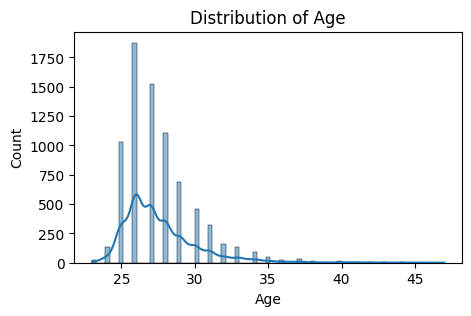


Summary statistics for Age:
count    7700.00
mean       27.59
std         2.52
min        23.00
25%        26.00
50%        27.00
75%        29.00
max        47.00
Name: Age, dtype: float64


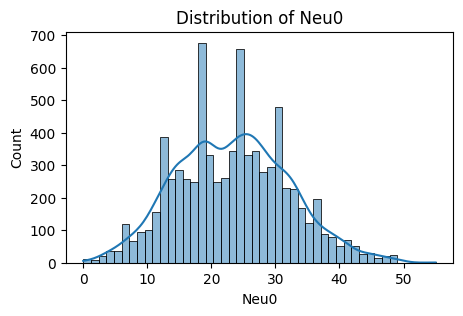


Summary statistics for Neu0:
count    7730.00
mean       23.32
std         8.78
min         0.00
25%        17.00
50%        23.00
75%        29.00
max        55.00
Name: Neu0, dtype: float64


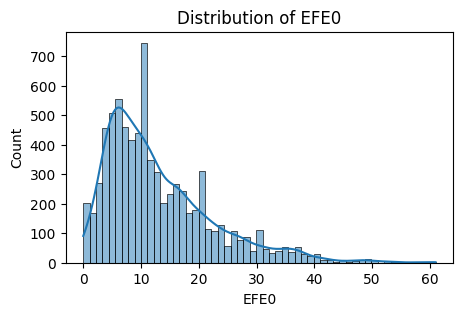


Summary statistics for EFE0:
count    7730.00
mean       13.05
std         9.43
min         0.00
25%         6.00
50%        11.00
75%        17.00
max        61.00
Name: EFE0, dtype: float64


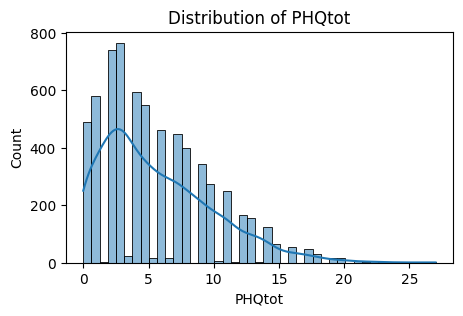


Summary statistics for PHQtot:
count    6654.00
mean        5.65
std         4.32
min         0.00
25%         2.00
50%         5.00
75%         8.00
max        27.00
Name: PHQtot, dtype: float64


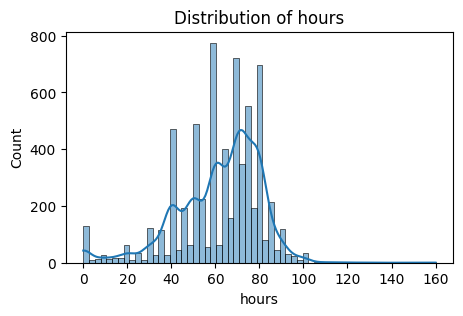


Summary statistics for hours:
count    6652.00
mean       61.70
std        19.24
min         0.00
25%        50.00
50%        65.00
75%        75.00
max       160.00
Name: hours, dtype: float64


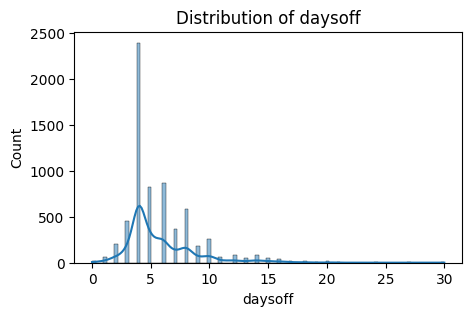


Summary statistics for daysoff:
count    6652.00
mean        5.80
std         3.09
min         0.00
25%         4.00
50%         5.00
75%         7.00
max        30.00
Name: daysoff, dtype: float64


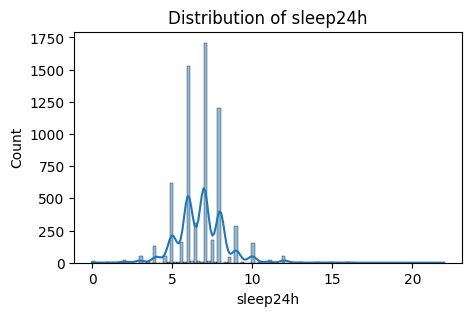


Summary statistics for sleep24h:
count    6652.00
mean        6.82
std         1.53
min         0.00
25%         6.00
50%         7.00
75%         8.00
max        22.00
Name: sleep24h, dtype: float64


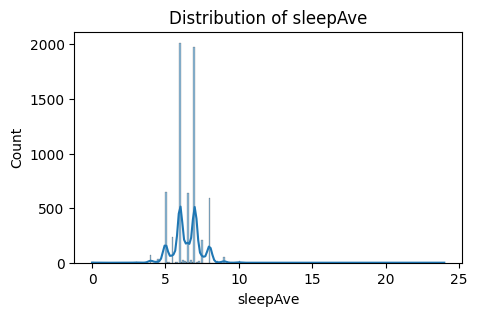


Summary statistics for sleepAve:
count    6652.00
mean        6.47
std         0.97
min         0.00
25%         6.00
50%         6.50
75%         7.00
max        24.00
Name: sleepAve, dtype: float64


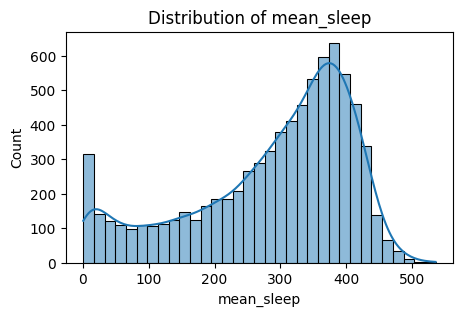


Summary statistics for mean_sleep:
count    7734.00
mean      287.60
std       122.19
min         0.70
25%       218.40
50%       322.25
75%       380.30
max       535.30
Name: mean_sleep, dtype: float64


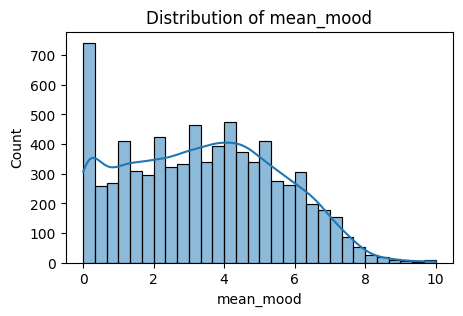


Summary statistics for mean_mood:
count    7734.00
mean        3.39
std         2.14
min         0.00
25%         1.60
50%         3.40
75%         5.00
max        10.00
Name: mean_mood, dtype: float64


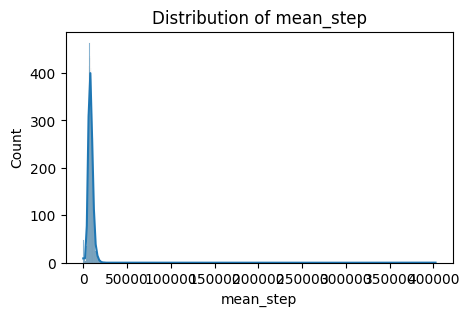


Summary statistics for mean_step:
count      7734.00
mean       8440.49
std        5218.89
min           0.00
25%        6651.02
50%        8102.05
75%        9861.65
max      402366.00
Name: mean_step, dtype: float64


In [210]:
# List of continuous variables
continuous_vars = ['Age', 'Neu0', 'EFE0', 'PHQtot', 'hours', 'daysoff', 
                  'sleep24h', 'sleepAve', 'mean_sleep', 'mean_mood', 'mean_step']

# Create separate plots for each variable
for var in continuous_vars:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data_clean_15_pos_sleep, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary statistics for {var}:")
    print(data_clean_15_pos_sleep[var].describe().round(2))


# hours, daysoff, sleep24h, mean_step



Original hours statistics:
count    6652.000000
mean       61.698419
std        19.236338
min         0.000000
50%        65.000000
99%        96.000000
max       160.000000
Name: hours, dtype: float64

Original daysoff statistics:
count    6652.000000
mean        5.801263
std         3.093425
min         0.000000
50%         5.000000
99%        17.000000
max        30.000000
Name: daysoff, dtype: float64

Original sleep24h statistics:
count    6652.000000
mean        6.824339
std         1.528811
min         0.000000
50%         7.000000
99%        12.000000
max        22.000000
Name: sleep24h, dtype: float64

Original mean_step statistics:
count      7734.000000
mean       8440.489540
std        5218.889694
min           0.000000
50%        8102.050000
99%       16279.576000
max      402366.000000
Name: mean_step, dtype: float64

After truncation:

hours statistics:
count    6652.000000
mean       61.637234
std        19.093329
min         0.000000
25%        50.000000
50%        65

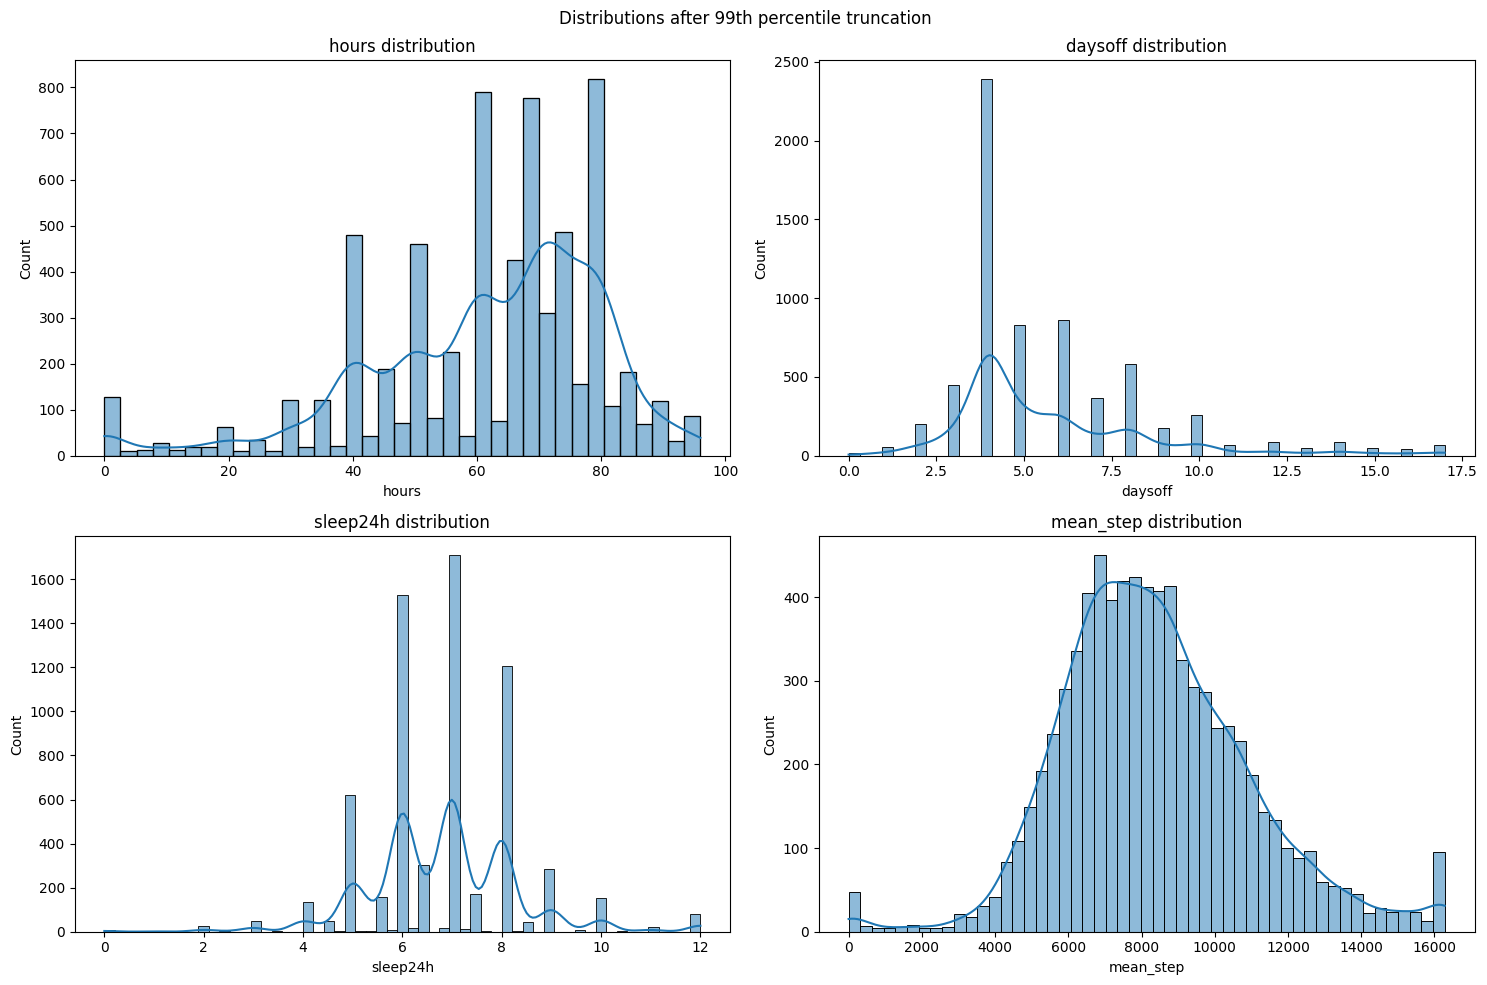

In [211]:
# Get original variable statistics
for var in ['hours', 'daysoff', 'sleep24h', 'mean_step']:
    print(f"\nOriginal {var} statistics:")
    print(data_clean_15_pos_sleep[var].describe(percentiles=[.99]))

# Truncate at 99th percentile
for var in ['hours', 'daysoff', 'sleep24h', 'mean_step']:
    percentile_99 = data_clean_15_pos_sleep[var].quantile(0.99)
    data_clean_15_pos_sleep[var] = data_clean_15_pos_sleep[var].clip(upper=percentile_99)

# Print new statistics after truncation
print("\nAfter truncation:")
for var in ['hours', 'daysoff', 'sleep24h', 'mean_step']:
    print(f"\n{var} statistics:")
    print(data_clean_15_pos_sleep[var].describe())

# Visual comparison using histograms
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions after truncation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distributions after 99th percentile truncation')

for i, var in enumerate(['hours', 'daysoff', 'sleep24h', 'mean_step']):
    row = i // 2
    col = i % 2
    sns.histplot(data=data_clean_15_pos_sleep, x=var, ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'{var} distribution')

plt.tight_layout()
plt.show()

<Axes: >

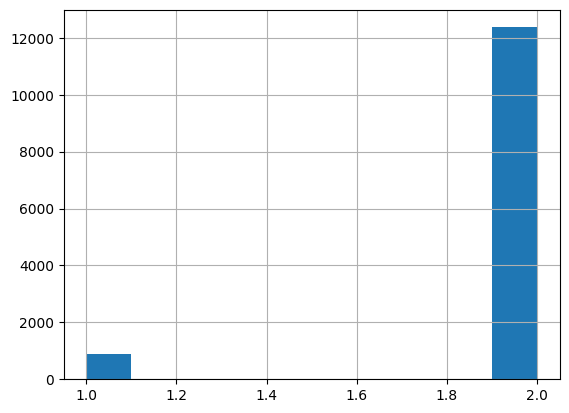

In [212]:
merged_data.ssrs_wish.hist()

In [213]:
# categorical_vars = ['Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity_rec', 
#                     'depr0', 'deprTreat0', 'PHQ10above', 'SLE', 'rotation', 'error1', "ssrs_wish"]

In [214]:
# Show original value counts
print("Original value counts:")
for var in ['Sex', 'Child', 'depr0', "ssrs_wish", 'error1', 'SigOther0', "deprTreat0"]:
    print(f"\n{var}:")
    print(data_clean_15_pos_sleep[var].value_counts().sort_index())

# Recode variables (1 stays 1, 2 becomes 0)
for var in ['Sex', 'Child', 'depr0', "ssrs_wish", 'error1', 'SigOther0', "deprTreat0"]:
    data_clean_15_pos_sleep[var] = data_clean_15_pos_sleep[var].map({1: 1, 2: 0})

# Verify the changes
print("\nAfter recoding (1 stays 1, 2 becomes 0):")
for var in ['Sex', 'Child', 'depr0']:
    print(f"\n{var}:")
    print(data_clean_15_pos_sleep[var].value_counts().sort_index())

Original value counts:

Sex:
Sex
1.0    3295
2.0    4439
Name: count, dtype: int64

Child:
Child
1     513
2    7221
Name: count, dtype: int64

depr0:
depr0
1    3766
2    3968
Name: count, dtype: int64

ssrs_wish:
ssrs_wish
1.0     524
2.0    6130
Name: count, dtype: int64

error1:
error1
1.0    1413
2.0    5245
Name: count, dtype: int64

SigOther0:
SigOther0
1    3750
2    3984
Name: count, dtype: int64

deprTreat0:
deprTreat0
1.0    1822
2.0    1944
Name: count, dtype: int64

After recoding (1 stays 1, 2 becomes 0):

Sex:
Sex
0    4439
1    3295
Name: count, dtype: int64

Child:
Child
0    7221
1     513
Name: count, dtype: int64

depr0:
depr0
0    3968
1    3766
Name: count, dtype: int64


<Axes: >

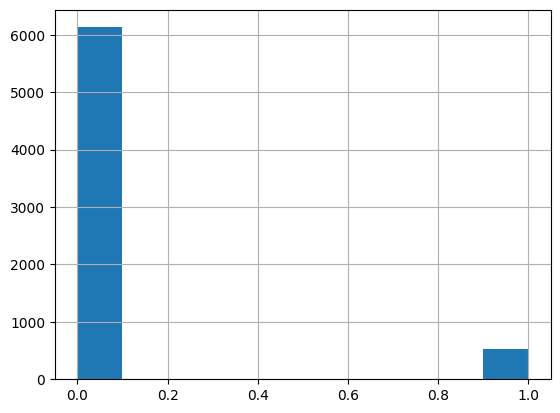

In [215]:
data_clean_15_pos_sleep.ssrs_wish.hist()


In [216]:
# First check original distribution
print("Original Ethnicity distribution:")
print(data_clean_15_pos_sleep['Ethnicity'].value_counts().sort_index())

# Create new recoded variable
data_clean_15_pos_sleep['Ethnicity_rec'] = data_clean_15_pos_sleep['Ethnicity'].map({
    1: 1,  # White
    2: 2,  # Black/African American
    3: 3,  # Latino/Hispanic
    4: 4,  # Asian
    5: 5,  # Others
    6: 5,  # Others
    7: 5,  # Others
    8: 5,  # Others
    9: 5   # Others
})

# Create dummy variables
ethnicity_dummies = pd.get_dummies(data_clean_15_pos_sleep['Ethnicity_rec'], prefix='Ethnicity')
ethnicity_dummies.columns = ['White', 'Black', 'Hispanic', 'Asian', 'Others']

# Add dummy variables to dataset
data_clean_15_pos_sleep = pd.concat([data_clean_15_pos_sleep, ethnicity_dummies], axis=1)

# Verify the changes
print("\nNew Ethnicity distribution:")
print(data_clean_15_pos_sleep['Ethnicity_rec'].value_counts().sort_index())

# Show distribution of dummy variables
print("\nDummy variables distribution:")
for col in ['White', 'Black', 'Hispanic', 'Asian', 'Others']:
    print(f"\n{col}:")
    print(data_clean_15_pos_sleep[col].value_counts().sort_index())

Original Ethnicity distribution:
Ethnicity
1.0    4617
2.0     376
3.0     269
4.0    1643
5.0       9
6.0       1
7.0      28
8.0     652
9.0     123
Name: count, dtype: int64

New Ethnicity distribution:
Ethnicity_rec
1.0    4617
2.0     376
3.0     269
4.0    1643
5.0     813
Name: count, dtype: int64

Dummy variables distribution:

White:
White
False    3117
True     4617
Name: count, dtype: int64

Black:
Black
False    7358
True      376
Name: count, dtype: int64

Hispanic:
Hispanic
False    7465
True      269
Name: count, dtype: int64

Asian:
Asian
False    6091
True     1643
Name: count, dtype: int64

Others:
Others
False    6921
True      813
Name: count, dtype: int64


In [217]:
categorical_vars = ['Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity_rec', 
                    'depr0', 'deprTreat0', 'PHQ10above', 'SLE', 'rotation', 'error1', "ssrs_wish"]

<Axes: >

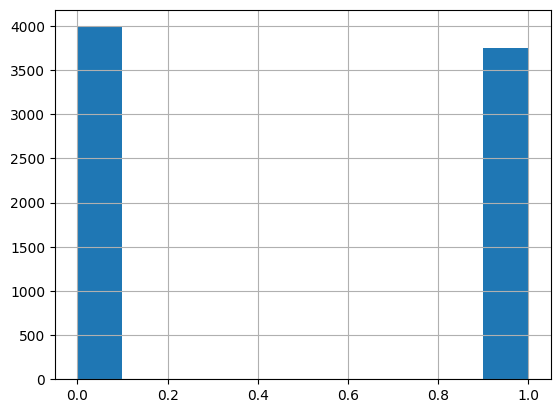

In [224]:
data_clean_15_pos_sleep.SigOther0.hist()

In [225]:
data_clean_15_pos_sleep.to_csv("./data/clean_data/sensor_selfreported_clean.csv")